In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc



In [4]:
bank=pd.read_csv("data\bank-full.csv", sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#check for any null values
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#check for any duplicate values
print(bank.duplicated().value_counts()) 

False    45211
dtype: int64


In [9]:
# Preprocess the data
# Assuming the target column is 'y'
X = bank.drop('y', axis=1)
y = bank['y'].map({'no': 0, 'yes': 1})  # Convert labels to binary (0 or 1)

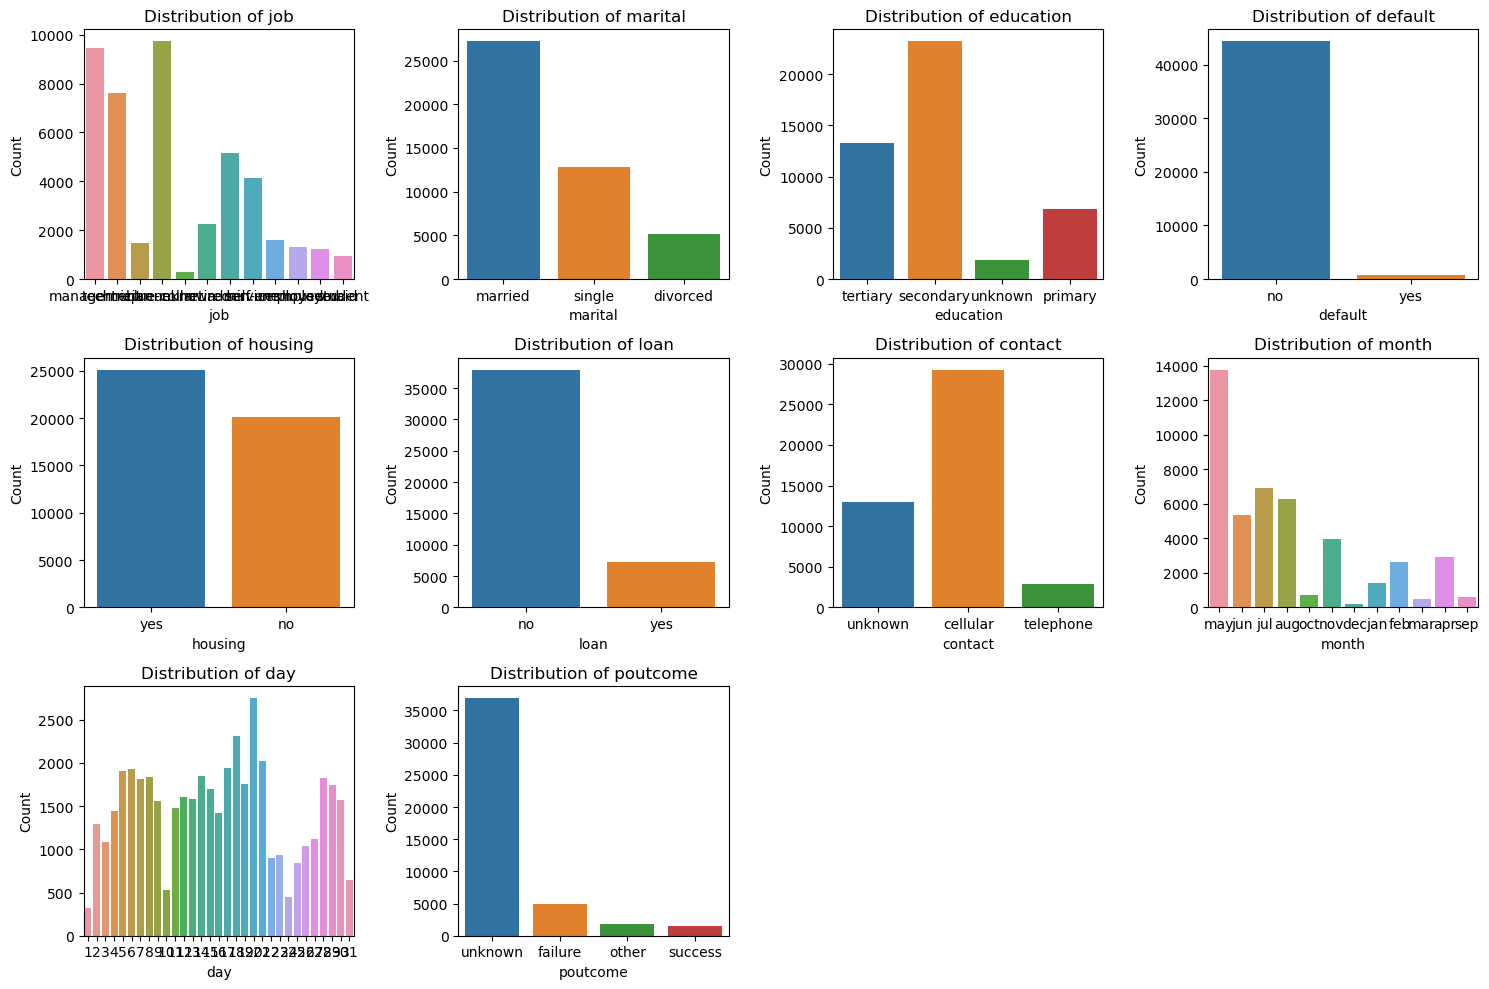

In [22]:
# Visualizations for categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=col, data=bank)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

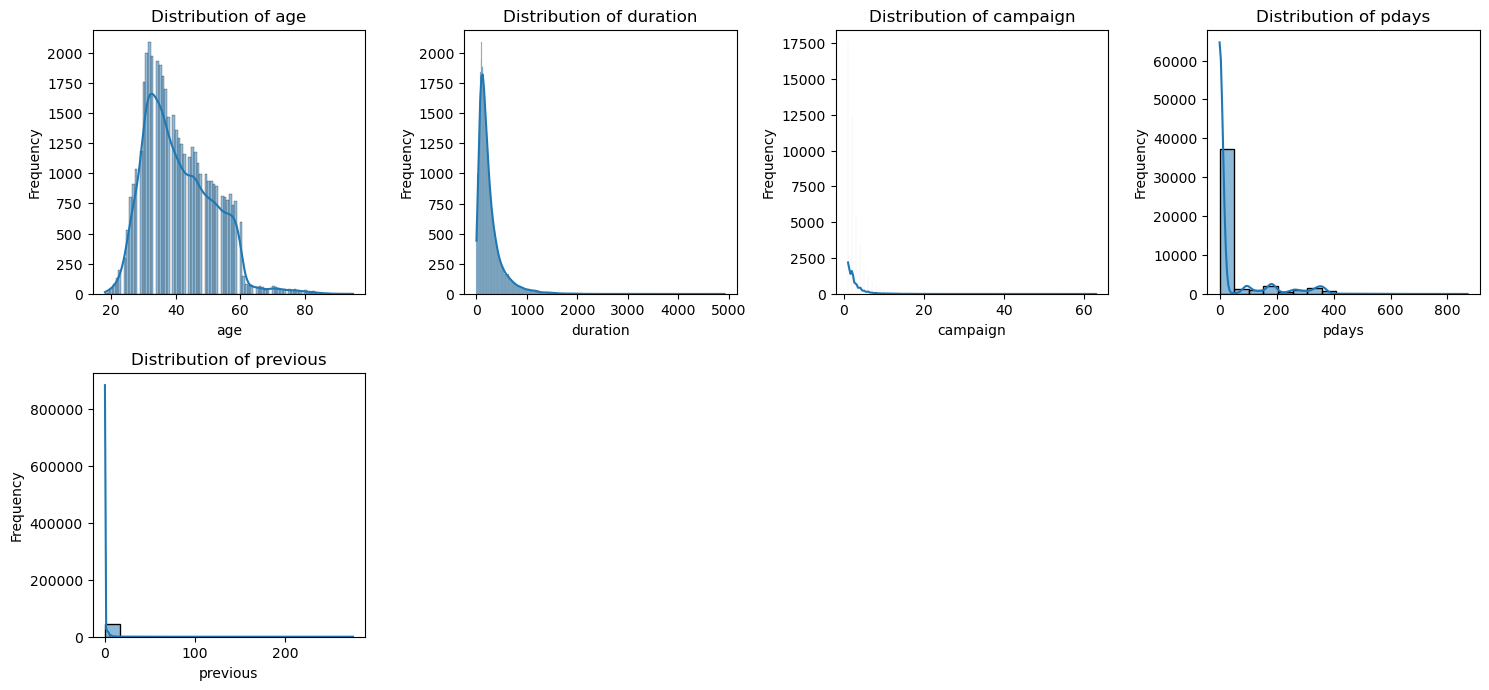

In [25]:
# Visualizations for continuous variables
continuous_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(bank[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Define classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'Support Vector Machines': SVC(probability=True)
}

Classifier: K-Nearest Neighbors
Confusion Matrix:
[[7713  239]
 [ 726  365]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.60      0.33      0.43      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.65      0.69      9043
weighted avg       0.88      0.89      0.88      9043

AUC-ROC: 0.8296
Precision-Recall AUC: 0.5176
--------------------------------------------------


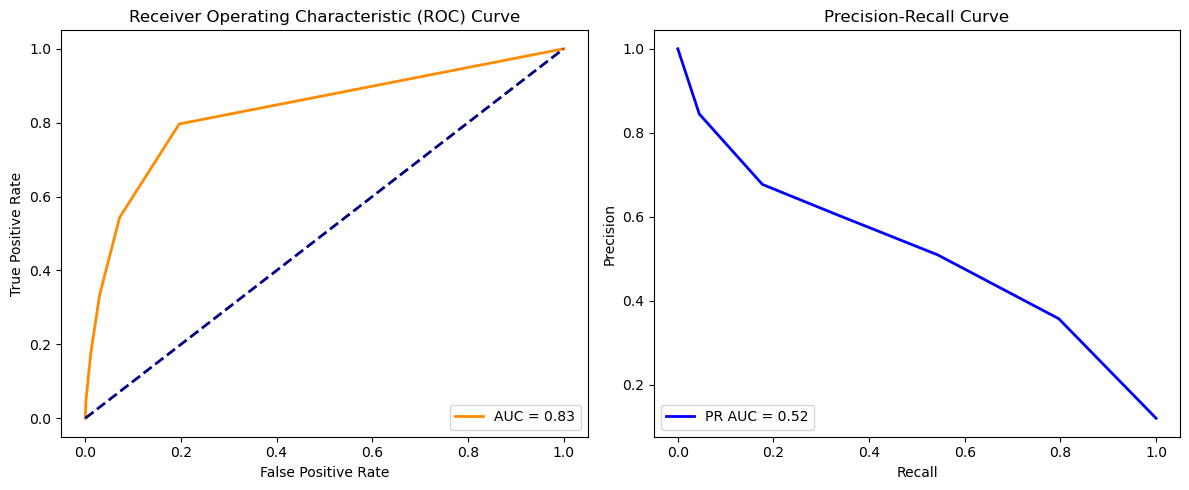

Classifier: Logistic Regression
Confusion Matrix:
[[7755  197]
 [ 719  372]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

AUC-ROC: 0.9046
Precision-Recall AUC: 0.5594
--------------------------------------------------


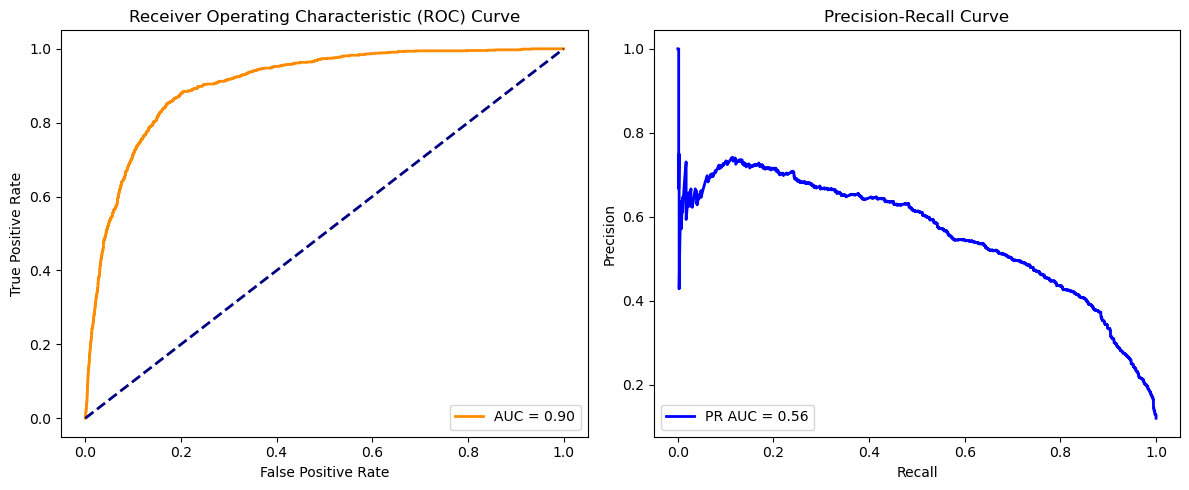

Classifier: Decision Trees
Confusion Matrix:
[[7356  596]
 [ 548  543]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.50      0.49      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.88      0.87      0.87      9043

AUC-ROC: 0.7114
Precision-Recall AUC: 0.5175
--------------------------------------------------


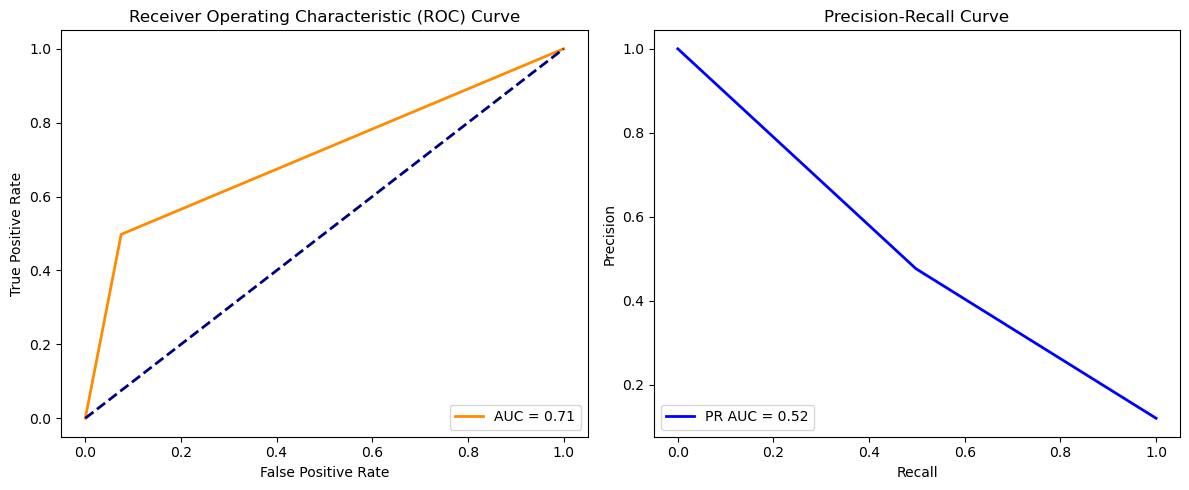

In [ ]:
# Model evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Print evaluation metrics
    print(f'Classifier: {name}')
    print('Confusion Matrix:')
    print(cm)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f'AUC-ROC: {roc_auc:.4f}')
    print(f'Precision-Recall AUC: {pr_auc:.4f}')
    print('-' * 50)

    # Plot ROC Curve and Precision-Recall Curve
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()